Set up the PYTHONPATH so it can find the python modules we'll be using.

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

In [2]:
from ufl import grad, div, nabla_grad, dx, inner, dot, Measure, FacetNormal, SpatialCoordinate, TestFunctions, TrialFunctions, div, exp, inner
from dolfinx.fem.petsc import LinearProblem 


Import the geometry module

In [3]:
import geometry as geo

Set the base resolution that will be used throughout

In [4]:
minres = 1.0

In [5]:
geo.SlabSpline?


Init signature: geo.SlabSpline(xs, ys, res=None, name=None, sid=None, bctype='natural')
Docstring:      <no docstring>
File:           ~/Documents/Fenicsx-subduction/python/geometry.py
Type:           type
Subclasses:     

In [6]:
slab = geo.SlabSpline([0.0, 140.0, 240.0, 400.0], [0.0, -70.0, -120.0, -200.0], 
                       res=[2*minres, 1*minres, 1*minres, 6*minres], sid=1, name="Slab")
print(len(slab.points))

  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



4


In [7]:
# add partial coupling depths
slab.addpoint(80, "Slab::PartialCouplingDepth", res=1*minres)
slab.addpoint(82.5, "Slab::FullCouplingDepth", res=1*minres)
print(len(slab.points))

6


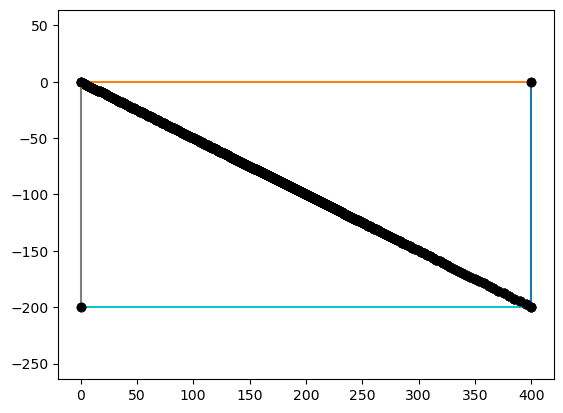

In [8]:
geom = geo.SubductionGeometry(slab, slab_rid=1, wedge_rid=2, 
                                    slab_side_sid=2, wedge_side_sid=3, slab_base_sid=7, 
                                    wedge_base_sid=8, coast_sid=11, top_sid=12,
                                    wedge_top_res=4*minres, slab_base_res=6*minres)
geom.plot()

In [9]:
geom.addcrustlayer?

Signature:
geom.addcrustlayer(
    depth,
    name,
    sid=None,
    rid=None,
    slab_res=None,
    side_res=None,
    slab_sid=None,
    side_sid=None,
)
Docstring: Add a crustal layer to the subduction geometry.
File:      ~/Documents/Fenicsx-subduction/python/geometry.py
Type:      method

  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



['WedgeSide', 'LowerCrust']
7


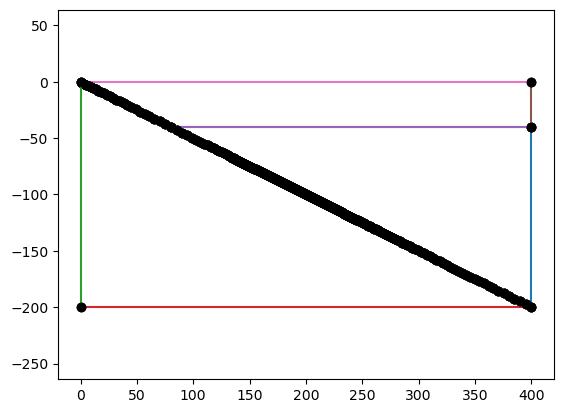

In [10]:
geom.addcrustlayer(40, "LowerCrust", sid=9, rid=3, slab_res=6*minres, side_res=16*minres, slab_sid=13, side_sid=5)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
print(len(slab.points))
geom.plot()


In [11]:
geom.writegeofile('benchmark1layer.geo_unrolled')

Info    : Writing 'benchmark1layer.geo_unrolled'...
Info    : Done writing 'benchmark1layer.geo_unrolled'


['WedgeSide', 'LowerCrust', 'UpperCrust']


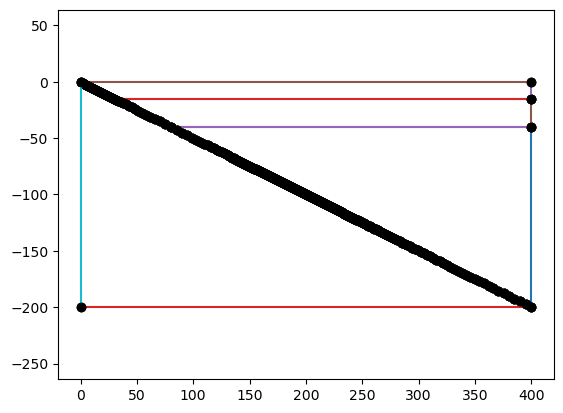

In [12]:
geom.addcrustlayer(15,"UpperCrust", sid=10, rid=4, slab_res= 2*minres, side_res=4*minres, side_sid=6)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
geom.plot()


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


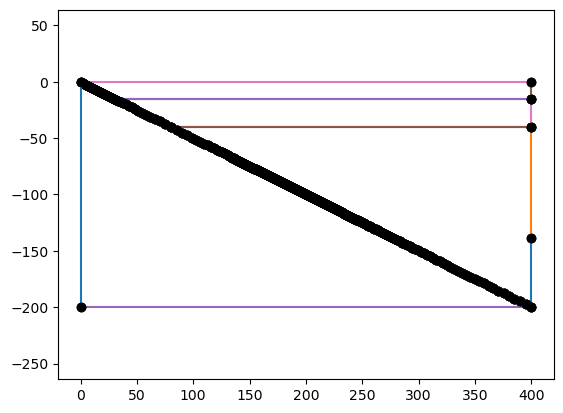

In [13]:
geom.addwedgesidepoint(139, "WedgeSide::InOut", line_name="UpperWedgeSide", res=4*minres, sid=4)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


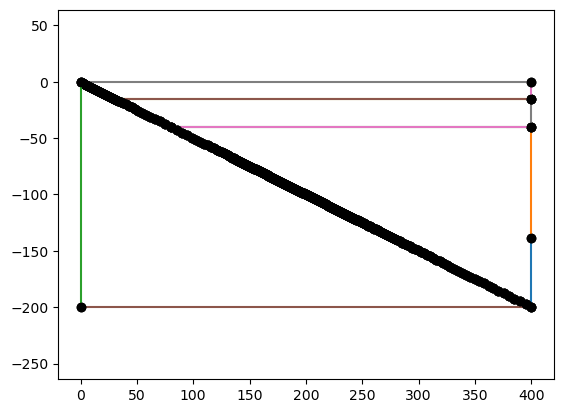

In [14]:
geom.addslabpoint(100, "Slab::DetectorPoint", res=1*minres)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


In [15]:
geom.writegeofile('benchmark.geo_unrolled')

Info    : Writing 'benchmark.geo_unrolled'...
Info    : Done writing 'benchmark.geo_unrolled'


In [16]:
mesh, ct, ft = geom.generatemesh()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
I


No module named 'trame'

Falling back to a static output.
  warnings.warn(



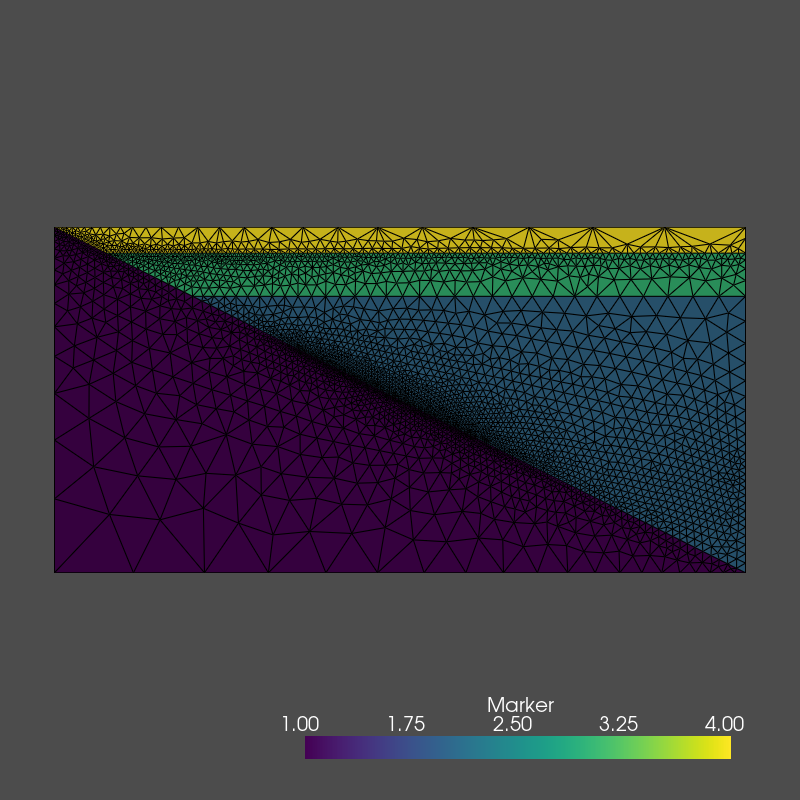

In [17]:
import pyvista
pyvista.start_xvfb()
from dolfinx.plot import create_vtk_mesh
topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
grid.set_active_scalars("Marker")

p = pyvista.Plotter(window_size=[800, 800])
p.add_mesh(grid, show_edges=True)
p.view_xy()
p.show()

In [18]:
import dolfinx
import numpy as np
import ufl
from dolfinx.fem import Function, FunctionSpace, dirichletbc, locate_dofs_geometrical, locate_dofs_topological, form

Ps2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Ps1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)
Ve = FunctionSpace(mesh, Ps2)
Pe = FunctionSpace(mesh, Ps1)
THs = Ps2 * Ps1
Vs = FunctionSpace(mesh, THs)

(v_as, p_as) = ufl.TrialFunctions(Vs)
(v_ts, p_ts) = ufl.TestFunctions(Vs)

Vs0, _ = Vs.sub(0).collapse()
Vs00, _ = Vs0.sub(0).collapse()
Vs01, _ = Vs0.sub(1).collapse()
Vs1, _ = Vs.sub(1).collapse()

Pw2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Pw1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)
Vwe = FunctionSpace(mesh, Pw2)
Pwe = FunctionSpace(mesh, Pw1)
THw = Pw2 * Pw1
Vw = FunctionSpace(mesh, THw)

(v_aw, p_aw) = ufl.TrialFunctions(Vw)
(v_tw, p_tw) = ufl.TestFunctions(Vw)

Vw0, _ = Vw.sub(0).collapse()
Vw00, _ = Vw0.sub(0).collapse()
Vw01, _ = Vw0.sub(1).collapse()
Vw1, _ = Vw.sub(1).collapse()


Vt = FunctionSpace(mesh, (ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)))
T_a = ufl.TrialFunction(Vt)
T_t = ufl.TestFunction(Vt)



In [19]:
slab_surface_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 1, np.concatenate((ft.find(1), ft.find(13))))


In [20]:
slab_surface_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 1, np.concatenate((ft.find(1), ft.find(13))))


In [21]:
All_except_slab_dofs_Vs0 = dolfinx.fem.locate_dofs_topological((Vs.sub(0), Vs0), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [22]:
NonSlab_dofs_Vs0_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs0[0]) if dof not in slab_surface_dofs_Vs0[0]]
NonSlab_dofs_Vs0 = [All_except_slab_dofs_Vs0[i][NonSlab_dofs_Vs0_indices] for i in range(len(All_except_slab_dofs_Vs0))]

In [23]:
All_except_slab_dofs_Vs1 = dolfinx.fem.locate_dofs_topological((Vs.sub(1), Vs1), 2, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [24]:
NonSlab_dofs_Vs1_indices = [i for i, dof in enumerate(All_except_slab_dofs_Vs1[0]) if dof not in slab_surface_dofs_Vs1[0]]
NonSlab_dofs_Vs1 = [All_except_slab_dofs_Vs1[i][NonSlab_dofs_Vs1_indices] for i in range(len(All_except_slab_dofs_Vs1))]

In [25]:
slab_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(1))

In [26]:
slab_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(1))

In [27]:
upperWedge_surface_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 1, ft.find(9))

In [28]:
upperWedge_surface_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 1, ft.find(9))

In [29]:
All_except_wedge_dofs_Vw0 = dolfinx.fem.locate_dofs_topological((Vw.sub(0), Vw0), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [30]:
NonWedge_dofs_Vw0_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw0[0]) if dof not in slab_surface_dofs_Vw0[0]]
NonWedge_dofs_Vw0 = [All_except_wedge_dofs_Vw0[i][NonWedge_dofs_Vw0_indices] for i in range(len(All_except_wedge_dofs_Vw0))]


In [31]:
All_except_wedge_dofs_Vw1 = dolfinx.fem.locate_dofs_topological((Vw.sub(1), Vw1), 2, np.concatenate((ct.find(1), ct.find(3), ct.find(4))))

In [32]:
NonWedge_dofs_Vw1_indices = [i for i, dof in enumerate(All_except_wedge_dofs_Vw1[0]) if dof not in slab_surface_dofs_Vw1[0]]
NonWedge_dofs_Vw1 = [All_except_wedge_dofs_Vw1[i][NonWedge_dofs_Vw1_indices] for i in range(len(All_except_wedge_dofs_Vw1))]
NonWedge_dofs_Vw1[0].size

7348

In [33]:
NonWedgeTop_dofs_Vw1_indices = [i for i, dof in enumerate(NonWedge_dofs_Vw1[0]) if dof not in upperWedge_surface_dofs_Vw1[0]]
NonWedgeTop_dofs_Vw1 = [NonWedge_dofs_Vw1[i][NonWedgeTop_dofs_Vw1_indices] for i in range(len(NonWedge_dofs_Vw1))]
NonWedgeTop_dofs_Vw1[0].size

7284

In [34]:
Backarc_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, np.concatenate((ft.find(4), ft.find(5), ft.find(6))))

In [35]:
top_surface_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(12))

In [36]:
Trench_dofs_Vt = dolfinx.fem.locate_dofs_topological(Vt, 1, ft.find(2))

In [37]:
from petsc4py.PETSc import ScalarType
import scipy
zd = 97
Ts = 0
Tm = 1350
kc = 0.8064516
erf = scipy.special.erf
h0=1000
H1=0.419354
H2=0.087097
qs=2096774
z1=-15
z2=-40
kc=0.8064516
km=1
q1 = qs-(H1*z1)
q2=q1-H2*(z2-z1)
eta0=dolfinx.fem.Constant(mesh, ScalarType(10**21))
A_disl=28968
invA_disl=dolfinx.fem.Constant(mesh, ScalarType(1/A_disl))
E_o=dolfinx.fem.Constant(mesh, ScalarType(540000))
n=3.5
etamax=dolfinx.fem.Constant(mesh, ScalarType(10**25))
R=dolfinx.fem.Constant(mesh, ScalarType(8.3145))
T0=dolfinx.fem.Constant(mesh, ScalarType(1.0))
v0=dolfinx.fem.Constant(mesh, ScalarType(.023716014/365.25/24/60/60))
e0=dolfinx.fem.Constant(mesh, ScalarType(v0/h0))
nexp = (n-1.)/n
# eta0, invA_disl, E_o, etamax, R, T0, v0, e0

invA_disl, e0**nexp, eta0*invA_disl*(e0**nexp), nexp, 1./(invA_disl*(e0**nexp))

(Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 1),
 Power(Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 7), FloatValue(0.7142857142857143)),
 Product(Product(Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 0), Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 1)), Power(Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 7), FloatValue(0.7142857142857143))),
 0.7142857142857143,
 Division(FloatValue(1.0), Product(Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 1), Power(Constant(Mesh(VectorElement(Basix element (P, triangle, 1, equispaced, unset, False), 2), 0), (), 7), FloatValue(0.7142857142857143)))))

In [38]:
Ttop = Function(Vt)
Ttop.x.set(0.0)
bc_Ttop = dirichletbc(Ttop, top_surface_dofs_Vt)

In [39]:
def T_l(x):
    return Tm*erf(-x[1]/zd) 
Ttrench = Function(Vt)
Ttrench.interpolate(T_l)
bc_trench_Vt = dirichletbc(Ttrench, Trench_dofs_Vt)

In [40]:

def T_backarc(values):
    Tbackarc = np.empty(values.shape[1])
    for i in range(values.shape[1]):
        x = values[:,i]
        if -x[1] >= -15:
            Tbackarc[i] = Ts-(H1*(-x[1]**2)/(2*kc))+(-x[1]*(qs/kc))
        elif -40 < x[1] < -15:
             Tbackarc[i] = ((Ts-(H1*(z1**2)/(2*kc))+((qs/kc)*z1))-(H2*(-x[1]-z1)/2*kc)+(q1*(-x[1]-z1)))
        else:
             Tbackarc[i] = min(Tm,((Ts-(H1*(z2**2)/(2*kc))+((qs/kc)*z2))+q2*(-x[1]-z2)/km))
        #else:
            #TBackarc=Tm
        
    return Tbackarc
TBackarc = Function(Vt)
TBackarc.interpolate(T_l)


bc_backarc_Vt = dirichletbc(TBackarc, Backarc_dofs_Vt)

In [41]:
zero_vs = Function(Vs0)
zero_vs.x.set(0.0)
bc_NonSlab_Vs0 = dirichletbc(zero_vs, NonSlab_dofs_Vs0, Vs.sub(0))


In [42]:
zero_ps = Function(Vs1)
zero_ps.x.set(0.0)
bc_NonSlab_Vs1 = dirichletbc(zero_ps, NonSlab_dofs_Vs1, Vs.sub(1))


In [43]:
zero_v = Function(Vw0)
zero_v.x.set(0.0)
bc_WedgeTop = dirichletbc(zero_v, upperWedge_surface_dofs_Vw0, Vw.sub(0))


In [44]:
zero_vw = Function(Vw0)
zero_vw.x.set(0.0)
bc_NonWedge_Vw0 = dirichletbc(zero_vw, NonWedge_dofs_Vw0, Vw.sub(0))


In [45]:
zero_pw = Function(Vw1)
zero_pw.x.set(0.0)
bc_NonWedgeTop_Vw1 = dirichletbc(zero_pw, NonWedgeTop_dofs_Vw1, Vw.sub(1))


In [46]:

vo = 0.023716

def slab_velocity_s(values):
    return_values = np.empty((2,values.shape[1]))
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = 0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_s = Function(Vs0)
Vslab_s.interpolate(slab_velocity_s)
bc_slab_s = dirichletbc(Vslab_s, slab_surface_dofs_Vs0, Vs.sub(0))


In [47]:

def slab_velocity_w(values):
    return_values = np.empty((2,values.shape[1]))
    cd = 80.0
    vo = 0.023716
    for i in range(values.shape[1]):
        x = values[:,i]
        return_values[:,i] = min(max(-(x[1]+cd)/2.5, 0.0), 1.0)*0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab_w = Function(Vw0)
Vslab_w.interpolate(slab_velocity_w)
bc_slab_w = dirichletbc(Vslab_w, slab_surface_dofs_Vw0, Vw.sub(0))


In [48]:
T_i=Function(Vt)
T_i.interpolate(Ttrench, ct.find(1))
T_i.interpolate(TBackarc, np.concatenate((ct.find(2), ct.find(3), ct.find(4))))

In [49]:
ds = ufl.Measure('ds', domain=mesh, subdomain_data=ft)
dx = ufl.Measure("dx", domain=mesh, subdomain_data=ct)

In [50]:
from petsc4py.PETSc import ScalarType

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Ks0 = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*ufl.sym(ufl.grad(v_as)))*dx(1) + zero_c*ufl.inner(v_ts, v_as)*dx
Gs = -ufl.div(v_ts)*p_as*dx(1)
Ds = -p_ts*ufl.div(v_as)*dx(1)
Ss0 = Ks0 + Gs + Ds + zero_c*p_ts*p_as*dx

#Ss = ufl.inner(v_ts, v_as)*ufl.dx + p_ts*p_as*ufl.dx

fs = zero_c * v_ts[0] * dx(1)
problem_vs0 = dolfinx.fem.petsc.LinearProblem(Ss0, fs, bcs=[bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
us_i = problem_vs0.solve()
vs_i=us_i.sub(0)

In [51]:
zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))
Kw0 = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*ufl.sym(ufl.grad(v_aw)))*dx(2) + zero_c*ufl.inner(v_tw, v_aw)*dx
Gw = -ufl.div(v_tw)*p_aw*dx(2)
Dw = -p_tw*ufl.div(v_aw)*dx(2)
Sw0 = Kw0 + Gw + Dw + zero_c*p_tw*p_aw*dx

#Sw = ufl.inner(v_tw, v_aw)*dx + p_tw*p_aw*dx


fw = zero_c * (v_tw[0] + v_tw[1] + p_tw) * dx(2)
problem_vw0 = dolfinx.fem.petsc.LinearProblem(Sw0, fw, bcs=[bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})
uw_i = problem_vw0.solve()
vw_i=uw_i.sub(0)

In [52]:
from ufl import sym, inner, dot
from ufl import sqrt
Tdim = Ts + T0*T_i
# wedge viscosity:
edot = sym(grad(vw_i))
eII = sqrt(0.5*inner(edot, edot))
# inverse dimensionless dislocation creep viscosity
inv_etadisl = eta0*invA_disl*exp(-E_o/(n*R*Tdim))*(e0**nexp)*(eII**nexp)
# inverse dimensionless effective viscosity
inv_etaprime = inv_etadisl + eta0/etamax
# "harmonic mean" viscosity (actually twice the harmonic mean)
etaprime = 1./inv_etaprime

# slab viscosity:
edots = sym(grad(vs_i))
eIIs = sqrt(0.5*inner(edots, edots))
# inverse dimensionless dislocation creep viscosity
inv_etadisls = eta0*A_disl*exp(-E_o/(n*R*Tdim))*(e0**nexp)*(eIIs**nexp)
# inverse dimensionless effective viscosity
inv_etaprimes = inv_etadisls + eta0/etamax
# "harmonic mean" viscosity (actually twice the harmonic mean)
etaprimes = 1./inv_etaprimes

In [53]:
S1 =  (T_t*dot(vs_i, grad(T_a))+inner(grad(T_a), grad(T_t)))*dx(1)
S2 =  (T_t*dot(vw_i, grad(T_a))+inner(grad(T_a), grad(T_t)))*dx(2)
S3 =  (inner(grad(T_a), grad(T_t)))*dx(3)
S4 =  (inner(grad(T_a), grad(T_t)))*dx(4)
St=S1+S2+S3+S4
ft = T_t*H1*dx(4) + T_t*H2*dx(3)

problem_T = LinearProblem(St, ft, u=T_i, bcs=[bc_Ttop, bc_trench_Vt, bc_backarc_Vt], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
#T_i = problem_T.solve()

In [54]:
Ks = ufl.inner(ufl.sym(ufl.grad(v_ts)), 2*etaprimes*ufl.sym(ufl.grad(v_as)))*dx(1) + zero_c*ufl.inner(v_ts, v_as)*dx
Ss = Ks + Gs + Ds + zero_c*p_ts*p_as*dx
problem_vs = dolfinx.fem.petsc.LinearProblem(Ss, fs, u=us_i, bcs=[bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})


In [55]:
Kw = ufl.inner(ufl.sym(ufl.grad(v_tw)), 2*etaprime*ufl.sym(ufl.grad(v_aw)))*dx(2) + zero_c*ufl.inner(v_tw, v_aw)*dx
Sw = Kw + Gw + Dw + zero_c*p_tw*p_aw*dx
fw = zero_c * (v_tw[0] + v_tw[1] + p_tw) * dx(2)
problem_vw = dolfinx.fem.petsc.LinearProblem(Sw, fw, u=uw_i, bcs=[bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], petsc_options={"ksp_type": "preonly", "pc_type": "lu", "pc_factor_mat_solver_type" : "mumps"})


In [56]:
from dolfinx import fem
rs = ufl.action(Ss, us_i)
rs_i = fem.assemble_vector(fem.form(rs))
fem.set_bc(rs_i.array, [bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], scale=0.0)
rw = ufl.action(Sw, uw_i) 
rw_i = fem.assemble_vector(fem.form(rw))
fem.set_bc(rw_i.array, [bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], scale=0.0)

rT = ufl.action(St, T_i) - ft
rT_i = fem.assemble_vector(fem.form(rT))
fem.set_bc(rT_i.array, [bc_Ttop, bc_trench_Vt, bc_backarc_Vt], scale=0.0)

r = (rs_i.norm()**2 + rw_i.norm()**2 + rT_i.norm()**2)**0.5
r0 = r
r_rel = r/r0
r_tol = 1e-9
print(r_rel, r)



1.0 22107.451678701924


In [57]:
max_its = 50
it = 0
while r_rel > r_tol:
    if it >= max_its: break
    T_i = problem_T.solve()
    us_i = problem_vs.solve()
    uw_i = problem_vw.solve()
    rs_i = fem.assemble_vector(fem.form(rs))
    fem.set_bc(rs_i.array, [bc_slab_s, bc_NonSlab_Vs1, bc_NonSlab_Vs0], scale=0.0)
    rw_i = fem.assemble_vector(fem.form(rw))
    fem.set_bc(rw_i.array, [bc_slab_w, bc_WedgeTop, bc_NonWedge_Vw0, bc_NonWedgeTop_Vw1], scale=0.0)
    
    rT_i = fem.assemble_vector(fem.form(rT))
    fem.set_bc(rT_i.array, [bc_Ttop, bc_trench_Vt, bc_backarc_Vt], scale=0.0)
    r = (rs_i.norm()**2 +rw_i.norm()**2 + rT_i.norm()**2)**0.5
    r_rel = r/r0
    print(r_rel, r, r0)
    it += 1

0.10522897684214495 2326.344520736963 22107.451678701924
0.054523987458639504 1205.3864180720225 22107.451678701924
0.024859961961267094 549.5904077930802 22107.451678701924
0.011741053055771028 259.56476308753355 22107.451678701924
0.005563407975941601 122.99277299703382 22107.451678701924
0.002953854131633153 65.30218748101396 22107.451678701924
0.001768678884175495 39.10098296705019 22107.451678701924
0.001033622713979863 22.850764203318562 22107.451678701924
0.000599488672730315 13.253166864314592 22107.451678701924
0.0005101683189841038 11.278521459945663 22107.451678701924
0.0005278925809956554 11.670359725906694 22107.451678701924
0.0004920486466717049 10.877941679865392 22107.451678701924
0.0004110294733172901 9.086814219884292 22107.451678701924
0.0003206701385137789 7.08919959199602 22107.451678701924
0.00024296801453596592 5.371403640824013 22107.451678701924
0.00018438686541464392 4.076323717341555 22107.451678701924
0.00014271766049555796 3.1551237831029337 22107.451678701


No module named 'trame'

Falling back to a static output.
  warnings.warn(



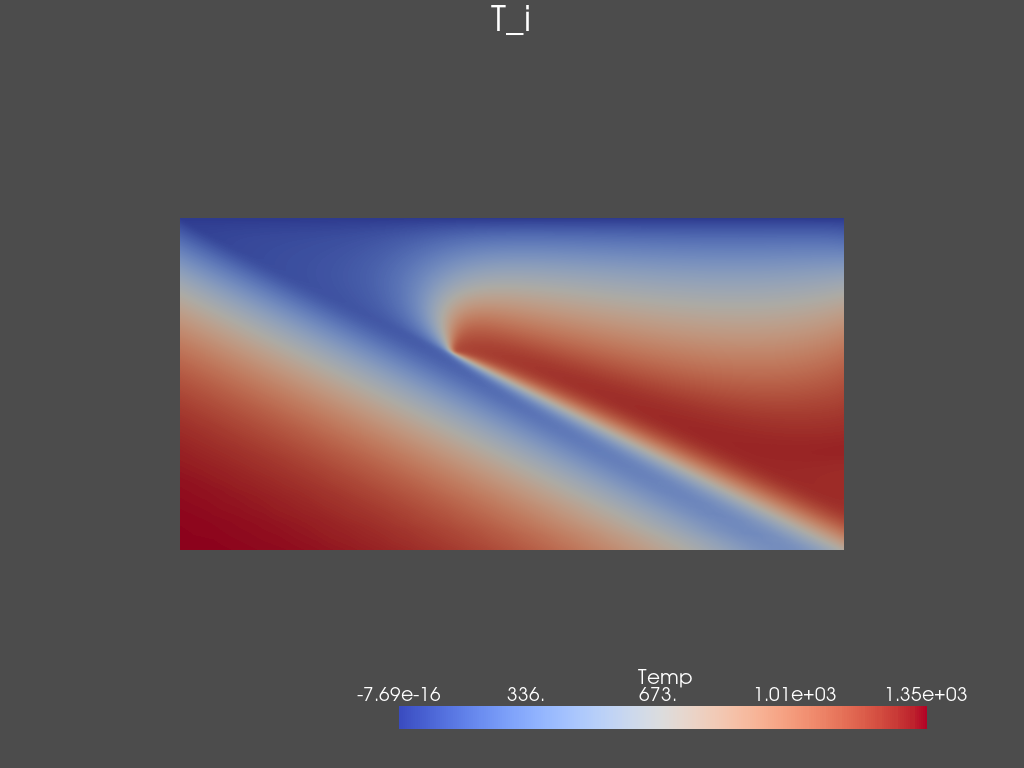

In [58]:
pyvista.start_xvfb()

from dolfinx.plot import create_vtk_mesh
pyvista_cells, cell_types, geometry = create_vtk_mesh(T_i.function_space)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temp"] = T_i.x.array
grid.set_active_scalars("Temp")

plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm')
plotter.view_xy()

if not pyvista.OFF_SCREEN:
    plotter.show()
else:
    figure = plotter.screenshot("Temp.pdf")


No module named 'trame'

Falling back to a static output.
  warnings.warn(



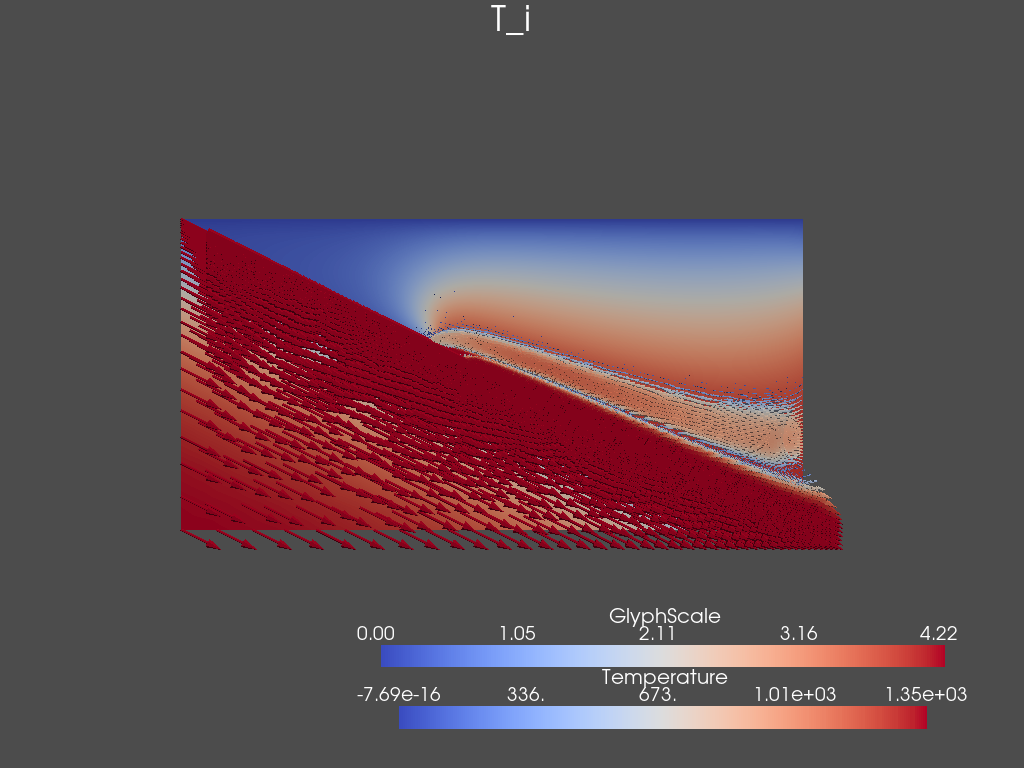

In [59]:
import pyvista
from dolfinx.plot import create_vtk_mesh

pyvista.start_xvfb()
topology_s, cell_types_s, geometry_s = create_vtk_mesh(Vs0)
values_s = np.zeros((geometry.shape[0], 3), dtype=np.float32)
values_s[:, :len(vs_i)] = vs_i.collapse().x.array.real.reshape((geometry.shape[0], len(vs_i)))

function_grid_s = pyvista.UnstructuredGrid(topology_s, cell_types_s, geometry_s)
function_grid_s["vs_i"] = values_s
glyphs_s = function_grid_s.glyph(orient="vs_i", factor=7.0)

pyvista.start_xvfb()
topology_w, cell_types_w, geometry_w = create_vtk_mesh(Vw0)
values_w = np.zeros((geometry.shape[0], 3), dtype=np.float32)
values_w[:, :len(vw_i)] = vw_i.collapse().x.array.real.reshape((geometry.shape[0], len(vw_i)))

function_grid_w = pyvista.UnstructuredGrid(topology_w, cell_types_w, geometry_w)
function_grid_w["vw_i"] = values_w
glyphs_w = function_grid_w.glyph(orient="vw_i", factor=7.0)

glyphs = glyphs_s+glyphs_w

pyvista_cells, cell_types, geometry = create_vtk_mesh(Vt)
grid = pyvista.UnstructuredGrid(pyvista_cells, cell_types, geometry)
grid.point_data["Temperature"] = T_i.x.array
grid.set_active_scalars("Temperature")
plotter = pyvista.Plotter()
plotter.add_text("T_i", position="upper_edge", font_size=14)
plotter.add_mesh(grid, show_edges=False, cmap = 'coolwarm')

plotter.add_mesh(glyphs, cmap='coolwarm')
plotter.view_xy()
if not pyvista.OFF_SCREEN:
     plotter.show()
else:
    glyphs = plotter.screenshot('glyphs.pdf', format='pdf')

In [ ]:
T_i((200,-100))